<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clase1/blob/main/ejercicio_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mini repaso  
| Término                   | Representa                                                |
| ------------------------- | --------------------------------------------------------- |
| Clase                     | La categoría asignada a una instancia                     |
| Característica            | Una propiedad individual de un ejemplo                    |
| Vector de características | Todas las características juntas                          |
| Instancia                 | Un ejemplo (vector de características + clase, si la hay) |


Un "testor" en el contexto de la clasificación de datos es un conjunto mínimo de atributos (características) que permite distinguir entre diferentes clases de objetos. Es decir, es la selección más pequeña de atributos que aún conserva la capacidad de diferenciar entre los distintos grupos o categorías que se están clasificando. En esencia, un testor identifica los atributos más relevantes para la tarea de clasificación.


#Simulación de Monte Carlo
Bullet Points:

1. Concepto Central

    Definición:

      "Método estadístico que utiliza muestreo aleatorio repetido para resolver problemas matemáticos/computacionales donde la solución analítica es compleja o imposible."

2. Origen Histórico

    1940s: Desarrollado por científicos del Proyecto Manhattan (John von Neumann, Stanislaw Ulam).

    Nombre: Inspirado en el Casino de Monte Carlo (Mónaco), símbolo del azar.

    Primer uso: Simular la difusión de neutrones en material fisible.

3. ¿Por qué funciona?

    Ley de los Grandes Números:

     
>  A medida que aumenta el número de observaciones, el promedio muestral se aproxima al valor esperado (media verdadera) de la distribución.




    Ejemplo intuitivo:

        Estimar π lanzando "dardos aleatorios" a un círculo inscrito en un cuadrado.

4. Pasos Básicos (Algoritmo)

    Definir el dominio: Espacio de posibles entradas (ej: distribuciones de probabilidad).

    Generar muestras aleatorias: Usar generadores de números pseudoaleatorios.

    Computar la función objetivo: Evaluar cada muestra (ej: simular un resultado financiero).

    Agregar resultados: Calcular promedios, varianzas, o construir histogramas.

    Validar: Verificar convergencia y error (ej: intervalo de confianza).

##Simular aparicion azarosa de tata box

Tarea: Estimar la probabilidad de que, en un grupo de regiones de ADN generadas al azar, se genere un motivo funcional de tipo "TATA box" por azar, sin presión selectiva ni mecanismos funcionales.

    Hacerlo para 1000 pares de bases
    Hacerlo para 10000 pares de bases

Investigar sobre la aparición aleatoria de la TATA box y citar la fuente (Máximo 300 palabras).

La TATA box es una secuencia promotora rica en timina y adenina, situada unos 25-35 pb antes del sitio de inicio de la transcripción en genes eucariotas, donde se une la proteína TBP (TATA-binding protein), parte del complejo de transcripción basal.



Progreso: 10000/10000 simulaciones (100%)
Probabilidad actual: 0.9116


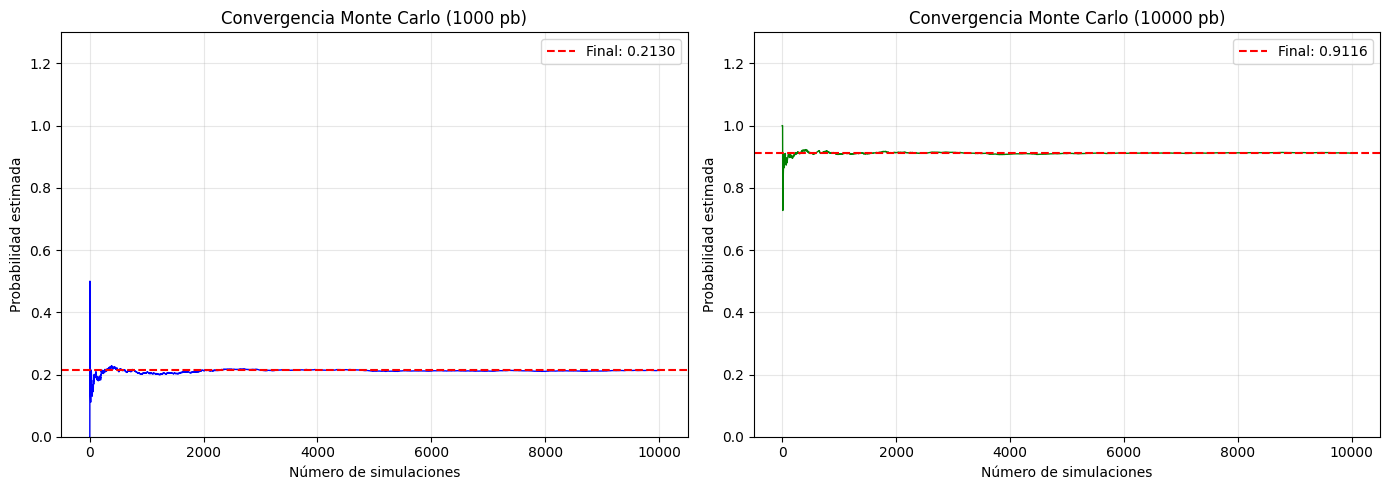


Resultados finales:
Probabilidad para 1000 pb: 0.213
Probabilidad para 10000 pb: 0.9116


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def simular_aparicion_motivo(longitud, motivo, n_sim=1000):
    n = len(motivo)
    count = 0
    probabilidades = []  # Almacena la probabilidad en cada paso

    for i in range(1, n_sim+1):
        # Generar secuencia aleatoria de ADN
        seq = ''.join(np.random.choice(['A','C','G','T'], size=longitud))

        # Verificar aparición del motivo
        if motivo in seq:
            count += 1

        # Calcular probabilidad acumulada
        prob_actual = count / i
        probabilidades.append(prob_actual)

        # Mostrar progreso cada 10%
        if i % (n_sim // 10) == 0:
            clear_output(wait=True)
            print(f"Progreso: {i}/{n_sim} simulaciones ({i/n_sim*100:.0f}%)")
            print(f"Probabilidad actual: {prob_actual:.4f}")

    return count / n_sim, probabilidades

# Parámetros
motivo = "TATAAA"

n_sim=10000

# Simulación para 1000 pb
mil, prob_mil = simular_aparicion_motivo(1000, motivo, n_sim)

# Simulación para 10000 pb
diezmil, prob_diezmil = simular_aparicion_motivo(10000, motivo, n_sim)

# Crear gráficos de convergencia
plt.figure(figsize=(14, 5))

# Gráfico para 1000 pb
plt.subplot(1, 2, 1)
plt.plot(range(1, n_sim+1), prob_mil, 'b-', linewidth=1)
plt.axhline(y=mil, color='r', linestyle='--', label=f'Final: {mil:.4f}')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad estimada')
plt.title('Convergencia Monte Carlo (1000 pb)')
plt.ylim(0, 1.3)
plt.legend()
plt.grid(alpha=0.3)

# Gráfico para 10000 pb
plt.subplot(1, 2, 2)
plt.plot(range(1, n_sim+1), prob_diezmil, 'g-', linewidth=1)
plt.axhline(y=diezmil, color='r', linestyle='--', label=f'Final: {diezmil:.4f}')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad estimada')
plt.title('Convergencia Monte Carlo (10000 pb)')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0, 1.3)
plt.tight_layout()
plt.show()

# Resultados finales
print("\nResultados finales:")
print("Probabilidad para 1000 pb:", mil)
print("Probabilidad para 10000 pb:", diezmil)

Probabilidad de Secuencias de ADN
Suponiendo que el ADN es una secuencia aleatoria con distribución uniforme de nucleótidos (A, T, G, C), la probabilidad de que una secuencia específica de longitud n (en este caso, 6) aparezca en una posición dada es:

$\left(\frac{1}{4}\right)^n$

Así, para la secuencia "TATAAA", la probabilidad es:


In [ ]:
print(np.power(0.25, 6))

0.000244140625


Fórmula:
P(al menos una aparición) = 1 - P(ninguna aparición)

P(al menos una aparición) = 1 - (1 - p)^N
Donde:

p = probabilidad de la secuencia = 0.00024

N = número de posiciones posibles = longitud_genoma - longitud_secuencia + 1


In [ ]:

def func(largo):
  return 1-np.power(1-np.power(0.25, 6),largo-5)
print (func (1000))
print (func (10000))


0.21568894227205537
0.9128812779731463


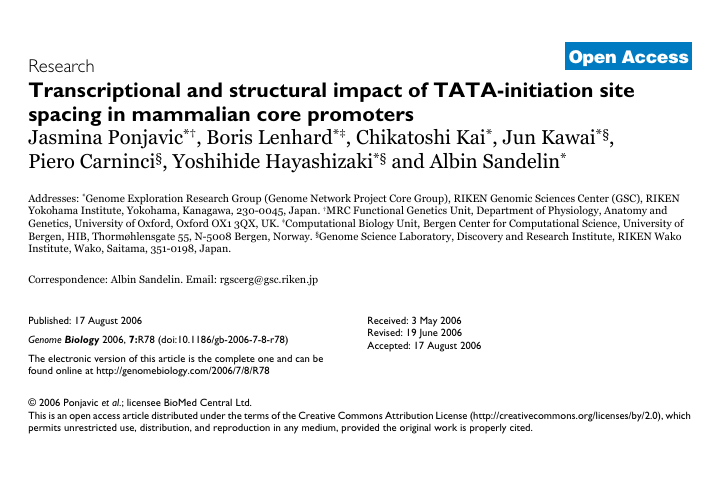

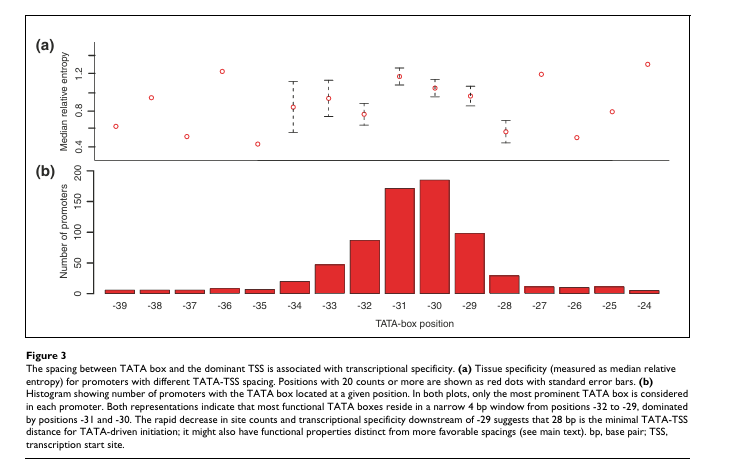

La caja TATA muestra una frecuencia elevada en las proximidades del sitio de acción, seguida de una caída progresiva que tiende a cero sin llegar a anularse por completo.

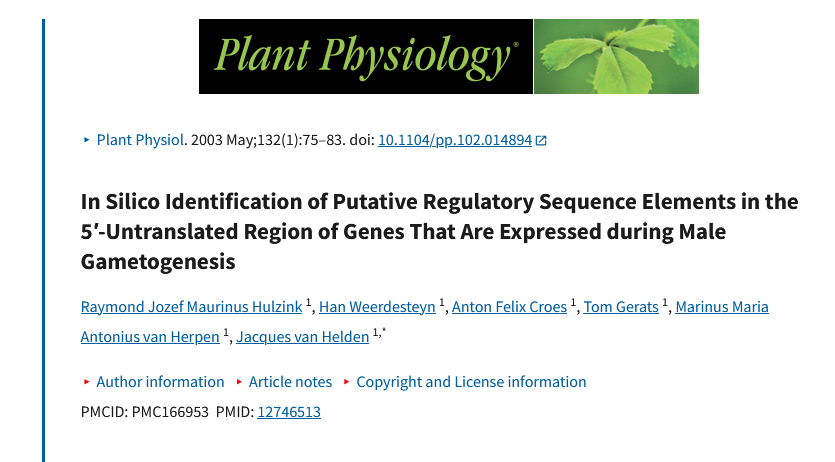


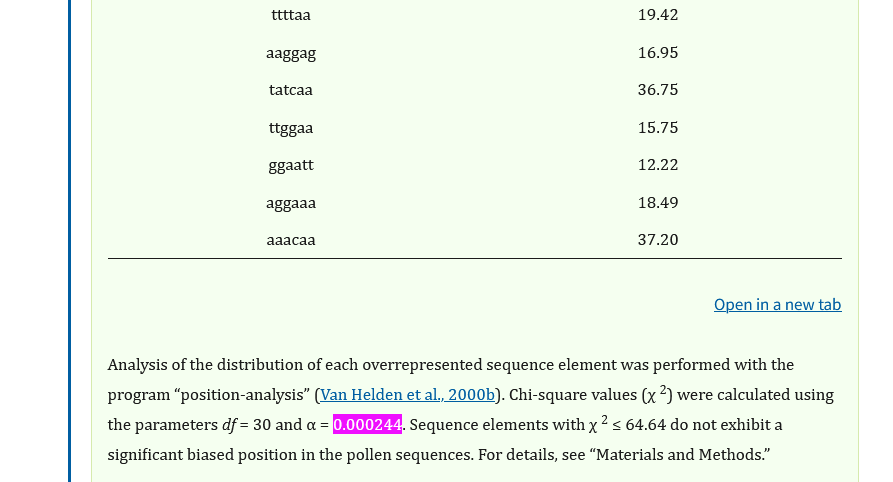

En este otro trabajo, comparan la probabilidad observada de aparición de una secuencia con la probabilidad teórica esperada bajo un modelo al azar. El objetivo es evaluar si la secuencia aparece más o menos frecuentemente de lo esperado, lo que podría sugerir que cumple alguna función biológica específica (por ejemplo, regulación, estructura secundaria, unión de proteínas, etc.).


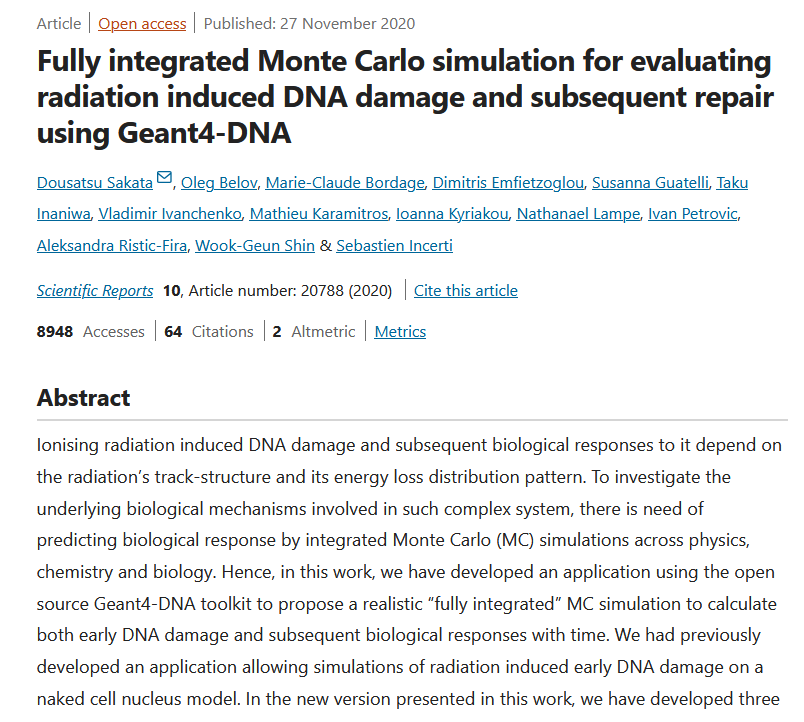

Recontra post data: el bootstrapping es considerado como un tipo de simulación de Monte Carlo